In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
file_path = 'E:/PROGRAMMING/Topmentor Files/Assignments/8-mar/Project - 1&2_ Simple_Reg/delivery_time.csv'
df = pd.read_csv(file_path)
print(df)

    Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


In [8]:
print("=======Displaying Basic Information========")
print(df.info())
print(df.head())

=======Displaying Basic Information========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes
None
   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


-----------CHARTS SHOWING VARIALBLE DISTRIBUTION---------


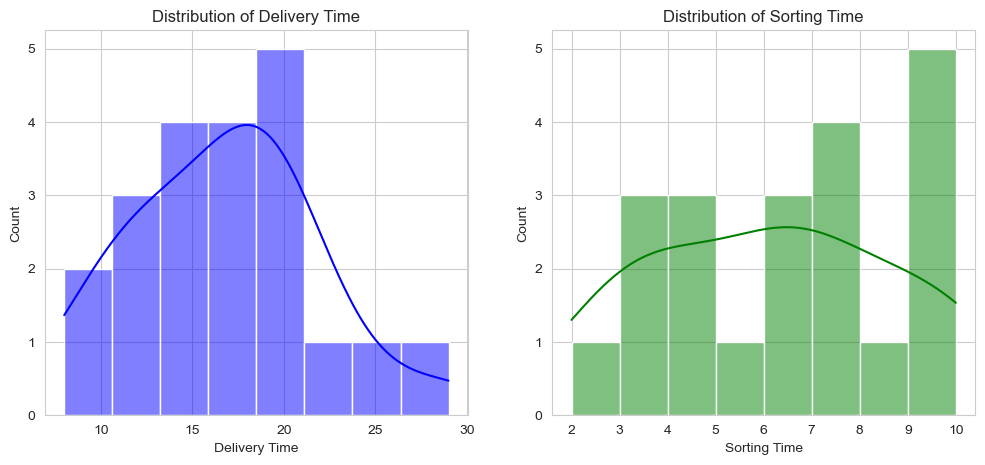

In [19]:
### Distribution of Variables
def vardist():
    sns.set_style("whitegrid")
    fig, axes = plt.subplots (1,2, figsize = (12,5))
    sns.histplot (df['Delivery Time'], kde = True, ax = axes[0], bins = 8, color = 'blue')
    axes[0].set_title('Distribution of Delivery Time')
    sns.histplot (df['Sorting Time'], kde = True, ax = axes[1], bins= 8, color= 'green')
    axes[1].set_title('Distribution of Sorting Time')
    plt.show()
print("-----------CHARTS SHOWING VARIALBLE DISTRIBUTION---------")
vardist()

--------CHARTS SHOWING RELATIONSHIP BETWEEN SORTING TIME AND DELIVERY TIME----------


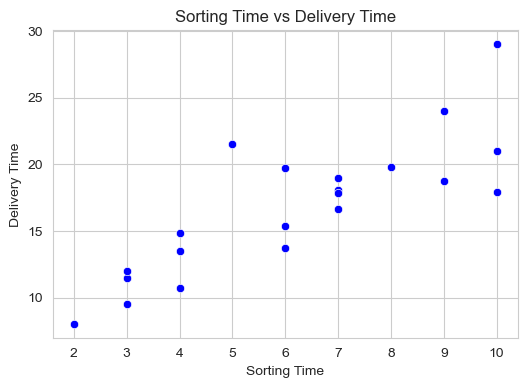

In [27]:
### CHECK RELATIONSHIP BETWEEN SORTING TIME AND DELIVERY TIME
def check_relationship():
    plt.figure(figsize = (6,4))
    sns.scatterplot(x = df ['Sorting Time'], y = df['Delivery Time'], color = 'blue')
    plt.title('Sorting Time vs Delivery Time')
    plt.xlabel('Sorting Time')
    plt.ylabel('Delivery Time')
    plt.show()
print('--------CHARTS SHOWING RELATIONSHIP BETWEEN SORTING TIME AND DELIVERY TIME----------')
check_relationship()
    

In [10]:
###Correlation matrix
def corr_matrix():
    correlation = df.corr()
    print(correlation)
print('---------CORRELATION MATRIX-------------\n')
corr_matrix()

---------CORRELATION MATRIX-------------

               Delivery Time  Sorting Time
Delivery Time       1.000000      0.825997
Sorting Time        0.825997      1.000000


In [18]:
####FEATURE AND TARGATE VARIABLES

X = df[['Sorting Time']]
y = df['Delivery Time']

##LOG TRANSFORMATION
X_log = np.log(X)
y_log = np.log(y)

###TEST TRAIN SPLIT
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size = 0.2, random_state = 42)


In [24]:
###Training and evaluating mode
def train_eval_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit (X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error = (y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mse, r2
model_original, mse_original, r2_original = train_eval_model(X_train, X_test, y_train, y_test)
model_log, mse_log, r2_log, = train_eval_model(X_log_train, X_log_test, y_log_train, y_log_test)

print("Training Completed!!!")
print("\nModel Performance:")
print("Original Data- \nMSE:", mse_original, "\nR2 Score:", r2_original)
print("Log-Transformed Data-\nMSE:", mse_log, "\nR2 Score:", r2_log)


Training Completed!!!

Model Performance:
Original Data- 
MSE: (0     21.00
17    18.11
15    14.88
1     13.50
8     17.90
Name: Delivery Time, dtype: float64, array([24.9247435 , 18.85200984, 12.77927618, 12.77927618, 24.9247435 ])) 
R2 Score: -1.0207599586367362
Log-Transformed Data-
MSE: (0     3.044522
17    2.896464
15    2.700018
1     2.602690
8     2.884801
Name: Delivery Time, dtype: float64, array([3.17069599, 2.9325148 , 2.55881334, 2.55881334, 3.17069599])) 
R2 Score: 0.008972630555435623


In [32]:
###PREDICTIONS FOR VISULIZATION
df["Predicted_Original"] = model_original.predict(X)
df["Predicted_Log"] = np.exp(model_log.predict(X_log))

print(df["Predicted_Original"])
print(df["Predicted_Log"])

0     24.924743
1     12.779276
2     16.827765
3     22.900499
4     24.924743
5     16.827765
6     18.852010
7     10.755032
8     24.924743
9     22.900499
10    20.876254
11    12.779276
12    18.852010
13    10.755032
14    10.755032
15    12.779276
16    16.827765
17    18.852010
18     8.730787
19    18.852010
20    14.803521
Name: Predicted_Original, dtype: float64
0     23.824060
1     12.920476
2     16.938273
3     22.205458
4     23.824060
5     16.938273
6     18.774786
7     10.662196
8     23.824060
9     22.205458
10    20.525842
11    12.920476
12    18.774786
13    10.662196
14    10.662196
15    12.920476
16    16.938273
17    18.774786
18     8.133099
19    18.774786
20    14.996617
Name: Predicted_Log, dtype: float64


PLOT FOR ORIGINAL MODEL



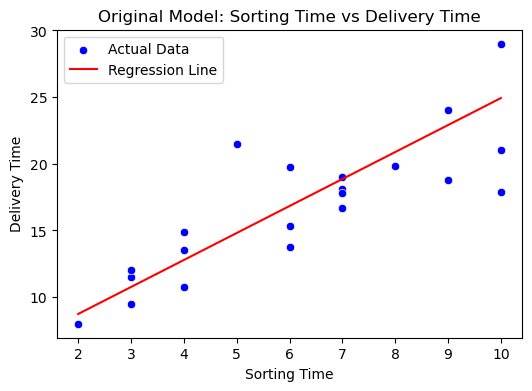

In [38]:
def plot_original():
    plt.figure(figsize = (6,4))
    sns.scatterplot(x = df["Sorting Time"], y = df["Delivery Time"], color = 'blue', label = "Actual Data")
    sns.lineplot(x=df["Sorting Time"], y=df["Predicted_Original"], color='red', label="Regression Line")
    plt.title("Original Model: Sorting Time vs Delivery Time")
    plt.xlabel("Sorting Time")
    plt.ylabel("Delivery Time")
    plt.legend()
    plt.show()
print("PLOT FOR ORIGINAL MODEL\n")
plot_original()

PLOT FOR LOG TRANSFORMED MODEL



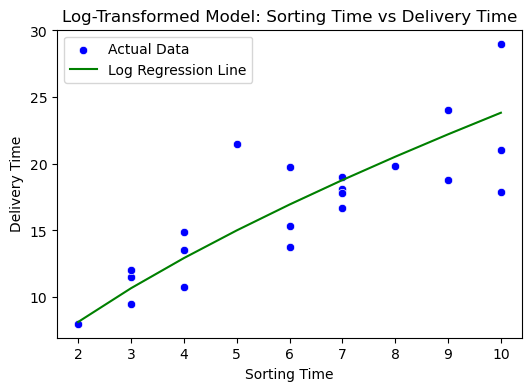

In [40]:
def plot_logtransformed():
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df["Sorting Time"], y=df["Delivery Time"], color='blue', label="Actual Data")
    sns.lineplot(x=df["Sorting Time"], y=df["Predicted_Log"], color='green', label="Log Regression Line")
    plt.title("Log-Transformed Model: Sorting Time vs Delivery Time")
    plt.xlabel("Sorting Time")
    plt.ylabel("Delivery Time")
    plt.legend()
    plt.show()
print("PLOT FOR LOG TRANSFORMED MODEL\n")
plot_logtransformed()